# CNN CIFAR-10 
---
*Mark Golovatskikh*




# Imports

In [343]:
# Imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import seaborn as sns

  # Load data

In [344]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualise data

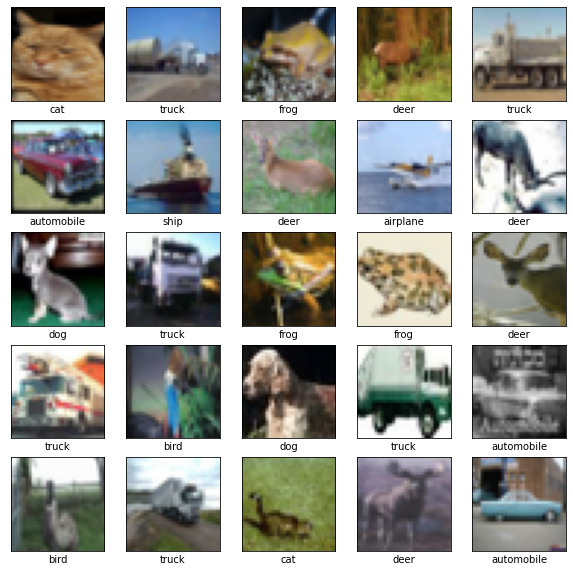

In [356]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [346]:
#split train to train & val

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=1)


# CREATE CNN

In [347]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [348]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)        

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Run model

In [349]:
epochs = 15
learning_rate = 0.001
batch_size = 32

In [350]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate) ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), batch_size=batch_size)

Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 78s 2ms/sample - loss: 1.6024 - accuracy: 0.4085 - val_loss: 1.2863 - val_accuracy: 0.5413
Epoch 2/15
37500/37500 [==============================] - 91s 2ms/sample - loss: 1.2325 - accuracy: 0.5578 - val_loss: 1.0453 - val_accuracy: 0.6368
Epoch 3/15
37500/37500 [==============================] - 93s 2ms/sample - loss: 1.0634 - accuracy: 0.6209 - val_loss: 0.9411 - val_accuracy: 0.6695
Epoch 4/15
37500/37500 [==============================] - 94s 3ms/sample - loss: 0.9727 - accuracy: 0.6558 - val_loss: 0.8844 - val_accuracy: 0.6887
Epoch 5/15
37500/37500 [==============================] - 99s 3ms/sample - loss: 0.8939 - accuracy: 0.6845 - val_loss: 0.8066 - val_accuracy: 0.7177
Epoch 6/15
37500/37500 [==============================] - 100s 3ms/sample - loss: 0.8414 - accuracy: 0.7009 - val_loss: 0.7968 - val_accuracy: 0.7218
Epoch 7/15
37500/37500 [==============================]

# Results

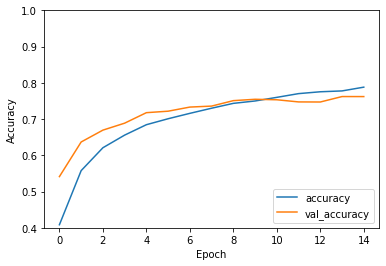

10000/1 - 6s - loss: 0.8144 - accuracy: 0.7670


In [351]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

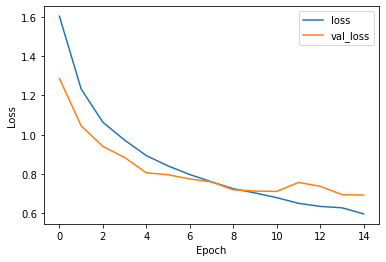

In [353]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

test:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1000
           1       0.92      0.86      0.89      1000
           2       0.68      0.63      0.65      1000
           3       0.58      0.58      0.58      1000
           4       0.71      0.77      0.74      1000
           5       0.63      0.74      0.68      1000
           6       0.76      0.88      0.82      1000
           7       0.88      0.76      0.81      1000
           8       0.90      0.84      0.87      1000
           9       0.83      0.88      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

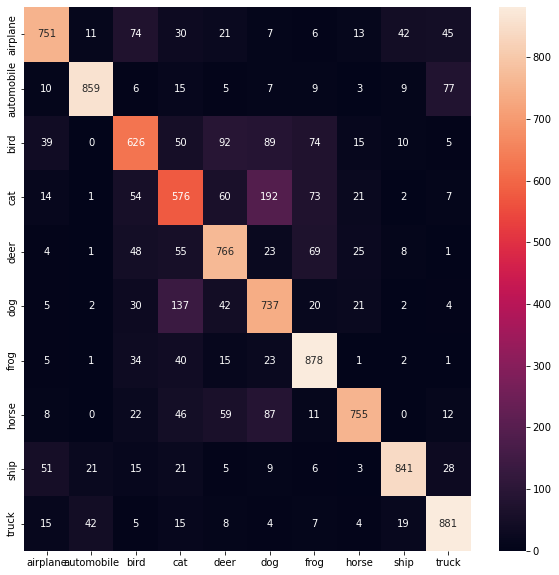

In [358]:
pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(test_labels), axis=1)
print('test:')
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
fsize = len(class_names)
plt.figure(figsize=(fsize, fsize))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
print(classification_report(Y_true, Y_pred_classes))
c.set(xticklabels=class_names, yticklabels=class_names)


# Transfer learning for CIFAR-100

## Add superclass vichicles2 - lawn-mower, rocket, streetcar, tank, tractor

In [379]:
from keras.datasets import cifar100
(train_images100, train_labels100), (test_images100, test_labels100) = cifar100.load_data(label_mode= 'fine')
# Normalize pixel values to be between 0 and 1
train_images100, test_images100 = train_images100 / 255.0, test_images100 / 255.0
# reload 10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# save only 10 % - 100 of each class
train_images, _, train_labels, _ = train_test_split(train_images, train_labels, test_size=0.9, random_state=1)
test_images, _, test_labels, _ = train_test_split(test_images, test_labels, test_size=0.9, random_state=1)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [381]:
test_images.shape

(1000, 32, 32, 3)

In [382]:
import copy

train_imagesAll = list(copy.deepcopy(train_images))
train_labelsAll = list(copy.deepcopy(train_labels))
test_imagesAll = list(copy.deepcopy(test_images))
test_labelsAll = list(copy.deepcopy(test_labels))
print(type(train_labelsAll[0]))

<class 'numpy.ndarray'>


In [383]:
coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [384]:
lawn_mower_label = coarse_label.index('lawn_mower')
rocket_label = coarse_label.index('rocket')
streetcar = coarse_label.index('streetcar')
tank = coarse_label.index('tank')
tractor = coarse_label.index('tractor')

In [385]:
vehicles2 = [lawn_mower_label, rocket_label, streetcar, tank, tractor]

In [386]:
for ind in range (len(train_images100)):
    class_label = train_labels100[ind][0]
    if class_label in vehicles2:
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([10+vehicles2.index(class_label)], dtype=np.uint8))

for ind in range (len(test_images100)):
    class_label = test_labels100[ind][0]
    if class_label in vehicles2:
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([10+vehicles2.index(class_label)], dtype=np.uint8))
print(np.unique(train_labelsAll))
print(np.unique(test_labelsAll))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [387]:
train_imagesAll = np.array(train_imagesAll)
train_labelsAll = np.array(train_labelsAll)
test_imagesAll = np.array(test_imagesAll)
test_labelsAll = np.array(test_labelsAll)

In [388]:
#split train to train & val

train_imagesAll, val_imagesAll, train_labelsAll, val_labelsAll = train_test_split(train_imagesAll, train_labelsAll, test_size=0.1, random_state=1)

In [390]:
train_labelsAll.shape

(6750, 1)

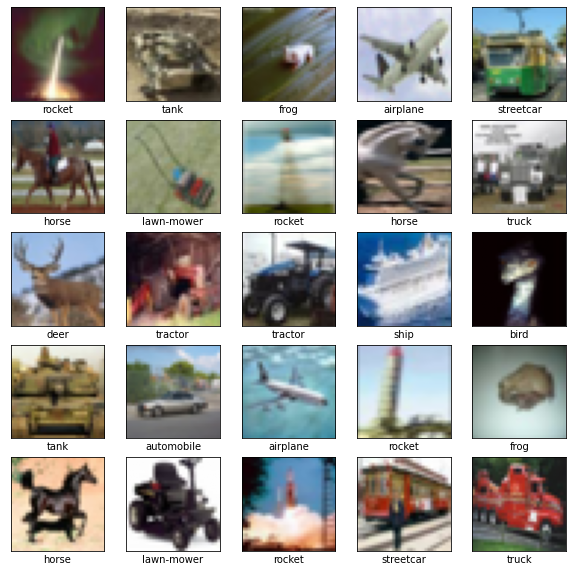

In [391]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.figure(figsize=(10,10))
n = 4
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_imagesAll[n+i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[val_labelsAll[n+i][0]])
plt.show()

## create model with replaced last layer

In [411]:
model.trainable = False

In [412]:
model_2 = models.Sequential()
for layer in model.layers[:-3]:
    model_2.add(layer)
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(15))
model_2.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)        

In [413]:
round(batch_size * 0.18)

6

In [414]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate* 0.1),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history2 = model_2.fit(train_imagesAll, train_labelsAll, epochs=epochs, validation_data=(val_imagesAll, val_labelsAll), shuffle=True, batch_size=round(batch_size * 0.18))

Train on 6750 samples, validate on 750 samples
Epoch 1/15
6750/6750 [==============================] - 14s 2ms/sample - loss: 2.0666 - accuracy: 0.3870 - val_loss: 1.4118 - val_accuracy: 0.6080
Epoch 2/15
6750/6750 [==============================] - 15s 2ms/sample - loss: 1.3793 - accuracy: 0.5656 - val_loss: 1.1377 - val_accuracy: 0.6493
Epoch 3/15
6750/6750 [==============================] - 19s 3ms/sample - loss: 1.1779 - accuracy: 0.6206 - val_loss: 1.0474 - val_accuracy: 0.6773
Epoch 4/15
6750/6750 [==============================] - 20s 3ms/sample - loss: 1.0720 - accuracy: 0.6501 - val_loss: 0.9906 - val_accuracy: 0.6920
Epoch 5/15
6750/6750 [==============================] - 20s 3ms/sample - loss: 0.9972 - accuracy: 0.6775 - val_loss: 0.9557 - val_accuracy: 0.6987
Epoch 6/15
6750/6750 [==============================] - 19s 3ms/sample - loss: 0.9419 - accuracy: 0.6919 - val_loss: 0.9431 - val_accuracy: 0.7080
Epoch 7/15
6750/6750 [==============================] - 19s 3ms/sample 

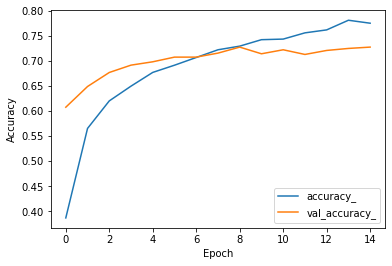

1500/1 - 1s - loss: 1.1449 - accuracy: 0.6933


In [416]:
plt.plot(history2.history['accuracy'], label='accuracy_')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy_')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_2.evaluate(test_imagesAll,  test_labelsAll, verbose=2)

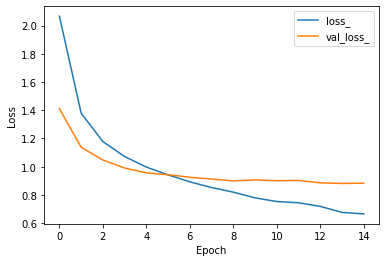

In [417]:
plt.plot(history2.history['loss'], label='loss_')
plt.plot(history2.history['val_loss'], label = 'val_loss_')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.63      0.71       104
           1       0.88      0.86      0.87       106
           2       0.65      0.54      0.59       105
           3       0.52      0.45      0.48        94
           4       0.58      0.66      0.62        89
           5       0.68      0.62      0.65        97
           6       0.62      0.83      0.71       108
           7       0.74      0.80      0.77        98
           8       0.76      0.84      0.80        97
           9       0.68      0.64      0.66       102
          10       0.76      0.68      0.72       100
          11       0.79      0.79      0.79       100
          12       0.65      0.74      0.69       100
          13       0.62      0.73      0.67       100
          14       0.68      0.57      0.62       100

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.70   

[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck'),
  Text(10.5, 0, 'lawn-mower'),
  Text(11.5, 0, 'rocket'),
  Text(12.5, 0, 'streetcar'),
  Text(13.5, 0, 'tank'),
  Text(14.5, 0, 'tractor')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck'),
  Text(0, 10.5, 'lawn-mower'),
  Text(0, 11.5, 'rocket'),
  Text(0, 12.5, 'streetcar'),
  Text(0, 13.5, 'tank'),
  Text(0, 14.5, 'tractor')]]

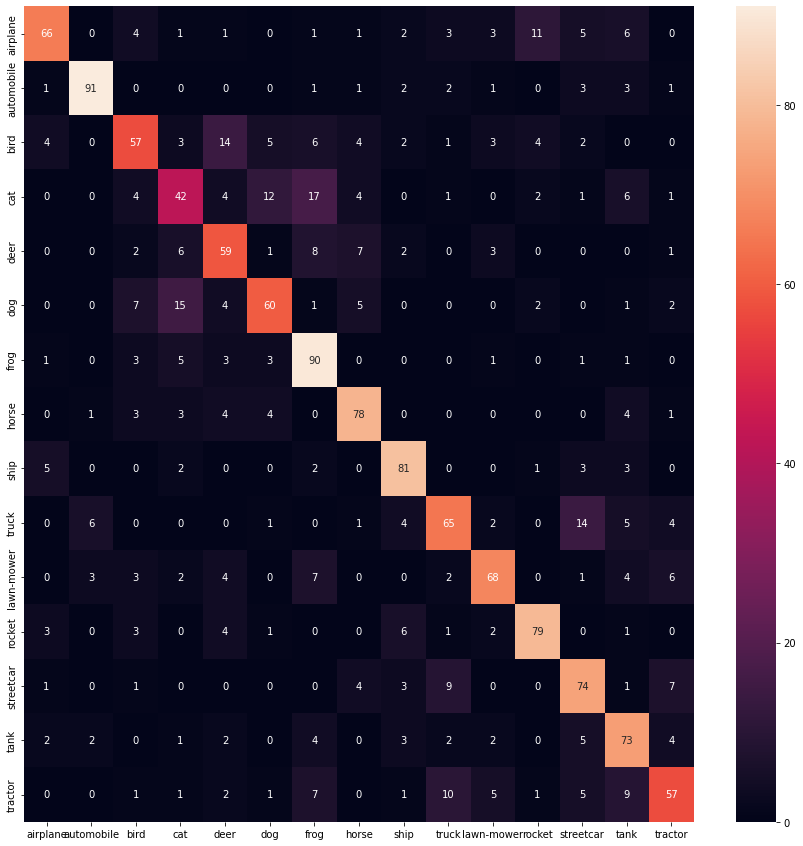

In [418]:
pred = model_2.predict(test_imagesAll)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(test_labelsAll), axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
fsize = len(class_names)
plt.figure(figsize=(fsize, fsize))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
print(classification_report(Y_true, Y_pred_classes))
c.set(xticklabels=class_names, yticklabels=class_names)

In [336]:
np.argmax(pred, axis=1) 

array([ 3,  8,  8, ...,  7,  2, 14])

In [337]:
Y_true

array([ 3,  8,  8, ..., 14, 11, 14])

In [338]:
pred = model.predict(train_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(train_labels), axis=1)
print('train:')
print(classification_report(Y_true, Y_pred_classes))
print(confusion_matrix(Y_true, Y_pred_classes))

train:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3763
           1       0.87      0.90      0.88      3754
           2       0.78      0.56      0.66      3708
           3       0.67      0.52      0.59      3747
           4       0.67      0.74      0.70      3751
           5       0.64      0.74      0.68      3767
           6       0.80      0.84      0.82      3757
           7       0.74      0.86      0.79      3744
           8       0.84      0.88      0.86      3765
           9       0.84      0.85      0.85      3744

    accuracy                           0.77     37500
   macro avg       0.77      0.77      0.76     37500
weighted avg       0.77      0.77      0.76     37500

[[2911   76  103   54   72   31   26   81  293  116]
 [  44 3361    7   13   14    9   22   22   68  194]
 [ 182   22 2095  193  475  300  211  148   54   28]
 [  39   24  132 1950  239  815  247  189   53   59]
 [  58    8  121  107 